# Group Name:

## Musketeers - 1653447 - 1647267 - 1850154

# House Prices: Advanced Regression Techniques


1) Preprocessing:

 - Target variable normalization.
 - Removing outliers by looking at the scatterplot of the feature more correlated with the prices.

2) Features:

 - Convert numbers in strings.
 - Imputing missing values by using some statistics (for example mode).
 - Compute skewness of features and apply the BoxCox transformation to the ones with skewness greather than 0.5 .
 - Features engeneering (creation of new features).
 - Removing features with a lot of zeros or with the same values over all the column.

3) Modelling:

 - Setting up models.
 - Fitting models on the train.
 - Evaluating models on the train.
 
4) Prediction:

 - Define the predictive function.
 - Predict prices of the test set.

## Defining the problem

Given 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, we try to predict the final price of each home, after learning some informations from a given dataset.

To solve this problem we need to know advanced regression techniques.

### Importing libraries

Here all the libraries to implement the solution of the problem:

In [64]:
import numpy as np
import pandas as pd 

# To plot

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

# Statistics

from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

# Models libraries

from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [65]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

# Limitation for float numbers
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) 

## Loading data

We load the datasets and we try to rescale the prices in a logarithmic scale and delete some evident outliers.

In [66]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_ID = train_df['Id']
test_ID = test_df['Id']

In [67]:
train_df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,nan,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [68]:
# Now drop the  'Id' colum since it's unnecessary for  the prediction process.

train_df.drop(['Id'], axis = 1, inplace = True)
test_df.drop(['Id'], axis = 1, inplace = True)

### Target variable

Let's take a look for the target variable of this project:


 mu = 180921.20 and sigma = 79415.29



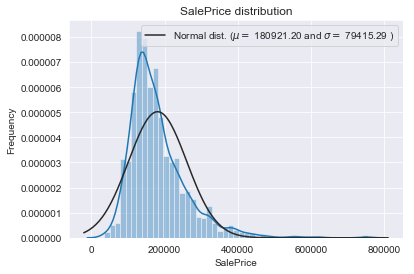

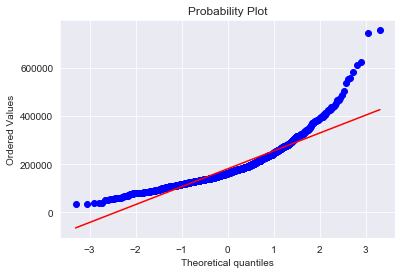

In [69]:
sns.distplot(train_df['SalePrice'] , fit = norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot = plt)
plt.show()

We want to rescale the prices because the models we will use are better with normal distributed data.


 mu = 12.02 and sigma = 0.40



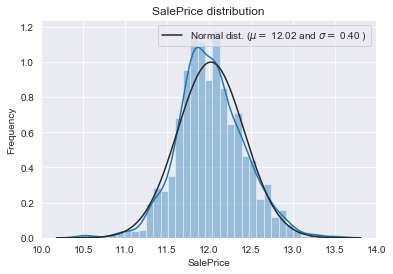

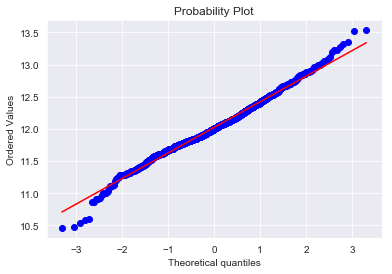

In [70]:
# We use the numpy fuction log1p which  applies log(1+x) to the column SalePrice
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

# Check the new distribution 
sns.distplot(train_df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()

Now we have prices normal distributed and the data points are following the theoretical quantiles. our target variable is ready to be used in regression models.

### Removing outliers

We want to remove outliers from the features with the highest correlation with the prices.

First we will take a look to the scatterplot of the variables most correlated and then, if we find some outliers points, we evalueate to remove them.


In [71]:
corr = train_df.corr()
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000,-0.386,-0.140,0.033,-0.059,0.028,0.041,0.023,-0.070,-0.066,...,-0.013,-0.006,-0.012,-0.044,-0.026,0.008,-0.008,-0.014,-0.021,-0.074
LotFrontage,-0.386,1.000,0.426,0.252,-0.059,0.123,0.089,0.193,0.234,0.050,...,0.089,0.152,0.011,0.070,0.041,0.206,0.003,0.011,0.007,0.356
LotArea,-0.140,0.426,1.000,0.106,-0.006,0.014,0.014,0.104,0.214,0.111,...,0.172,0.085,-0.018,0.020,0.043,0.078,0.038,0.001,-0.014,0.257
OverallQual,0.033,0.252,0.106,1.000,-0.092,0.572,0.551,0.412,0.240,-0.059,...,0.239,0.309,-0.114,0.030,0.065,0.065,-0.031,0.071,-0.027,0.817
OverallCond,-0.059,-0.059,-0.006,-0.092,1.000,-0.376,0.074,-0.128,-0.046,0.040,...,-0.003,-0.033,0.070,0.026,0.055,-0.002,0.069,-0.004,0.044,-0.037
YearBuilt,0.028,0.123,0.014,0.572,-0.376,1.000,0.593,0.316,0.250,-0.049,...,0.225,0.189,-0.387,0.031,-0.050,0.005,-0.034,0.012,-0.014,0.587
YearRemodAdd,0.041,0.089,0.014,0.551,0.074,0.593,1.000,0.180,0.128,-0.068,...,0.206,0.226,-0.194,0.045,-0.039,0.006,-0.010,0.021,0.036,0.566
MasVnrArea,0.023,0.193,0.104,0.412,-0.128,0.316,0.180,1.000,0.265,-0.072,...,0.160,0.126,-0.110,0.019,0.061,0.012,-0.030,-0.006,-0.008,0.431
BsmtFinSF1,-0.070,0.234,0.214,0.240,-0.046,0.250,0.128,0.265,1.000,-0.050,...,0.204,0.112,-0.102,0.026,0.062,0.140,0.004,-0.016,0.014,0.372
BsmtFinSF2,-0.066,0.050,0.111,-0.059,0.040,-0.049,-0.068,-0.072,-0.050,1.000,...,0.068,0.003,0.037,-0.030,0.089,0.042,0.005,-0.015,0.032,0.005


In [72]:
corr['SalePrice'].sort_values(ascending = False)[:10]

SalePrice      1.000
OverallQual    0.817
GrLivArea      0.701
GarageCars     0.681
GarageArea     0.651
TotalBsmtSF    0.612
1stFlrSF       0.597
FullBath       0.595
YearBuilt      0.587
YearRemodAdd   0.566
Name: SalePrice, dtype: float64

Here we can see the first ten most correlated features (with the price).

Now we will take a look to the scatter plot of the most correlated features and we try to remove some outliers if we find some of them:

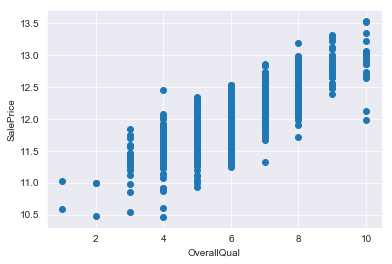

In [73]:
plt.scatter(x = train_df['OverallQual'], y = train_df.SalePrice)
plt.ylabel('SalePrice')
plt.xlabel('OverallQual')
plt.show()

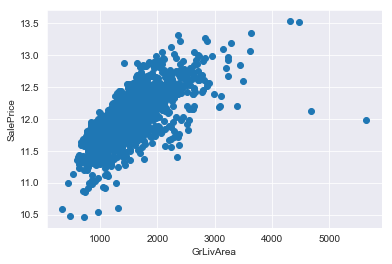

In [74]:
plt.scatter(x = train_df['GrLivArea'], y = train_df.SalePrice)
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

In [75]:
# Deleting outliers

train_df = train_df[train_df.GrLivArea < 4500]
train_df.reset_index(drop = True, inplace = True)

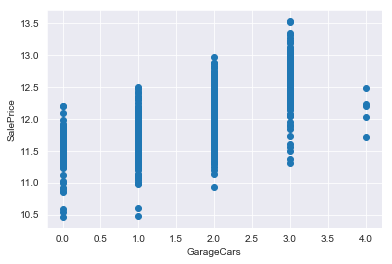

In [76]:
plt.scatter(x = train_df['GarageCars'], y = train_df.SalePrice)
plt.ylabel('SalePrice')
plt.xlabel('GarageCars')
plt.show()

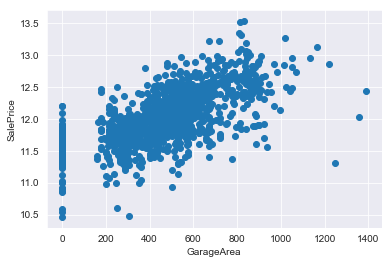

In [77]:
plt.scatter(x = train_df['GarageArea'], y = train_df.SalePrice)
plt.ylabel('SalePrice')
plt.xlabel('GarageArea')
plt.show()

In [78]:
train_df = train_df[train_df.GarageArea < 1215]

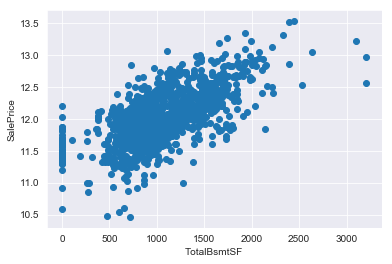

In [79]:
plt.scatter(x = train_df['TotalBsmtSF'], y = train_df.SalePrice)
plt.ylabel('SalePrice')
plt.xlabel('TotalBsmtSF')
plt.show()

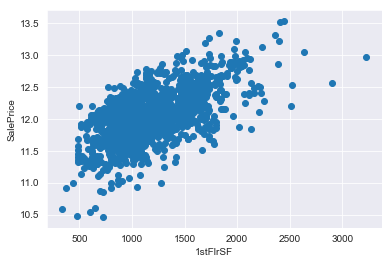

In [80]:
plt.scatter(x = train_df['1stFlrSF'], y = train_df.SalePrice)
plt.ylabel('SalePrice')
plt.xlabel('1stFlrSF')
plt.show()

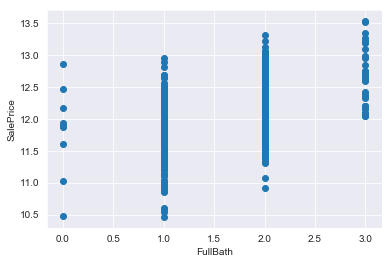

In [81]:
plt.scatter(x = train_df['FullBath'], y = train_df.SalePrice)
plt.ylabel('SalePrice')
plt.xlabel('FullBath')
plt.show()

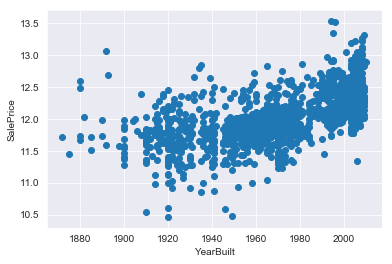

In [82]:
plt.scatter(x = train_df['YearBuilt'], y = train_df.SalePrice)
plt.ylabel('SalePrice')
plt.xlabel('YearBuilt')
plt.show()

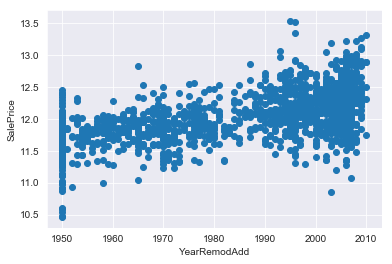

In [83]:
plt.scatter(x = train_df['YearRemodAdd'], y = train_df.SalePrice)
plt.ylabel('SalePrice')
plt.xlabel('YearRemodAdd')
plt.show()

Now we want to shiow the noe correlations, to take a look if after removing outliers we got an improvement:

In [84]:
corr = train_df.corr()

corr['SalePrice'].sort_values(ascending = False)[:10]

SalePrice      1.000
OverallQual    0.821
GrLivArea      0.724
GarageCars     0.686
GarageArea     0.669
TotalBsmtSF    0.646
1stFlrSF       0.619
FullBath       0.595
YearBuilt      0.586
YearRemodAdd   0.564
Name: SalePrice, dtype: float64

In general we can see we have better correlation values by removing the outliers; so we can say that removing outliers was a good choice.

In [85]:
#Now we can drop the prices column from the dataset

y = train_df.SalePrice.reset_index(drop = True)

train_features = train_df.drop(['SalePrice'], axis = 1)

len(y)

1454

Now we concatenate train and test sets in order to find a way to fill all the Nan values in the two datasets.

In [86]:
features = pd.concat([train_features, test_df]).reset_index(drop = True)

print(features.shape)

(2913, 79)


In [87]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2913 entries, 0 to 2912
Data columns (total 79 columns):
MSSubClass       2913 non-null int64
MSZoning         2909 non-null object
LotFrontage      2428 non-null float64
LotArea          2913 non-null int64
Street           2913 non-null object
Alley            198 non-null object
LotShape         2913 non-null object
LandContour      2913 non-null object
Utilities        2911 non-null object
LotConfig        2913 non-null object
LandSlope        2913 non-null object
Neighborhood     2913 non-null object
Condition1       2913 non-null object
Condition2       2913 non-null object
BldgType         2913 non-null object
HouseStyle       2913 non-null object
OverallQual      2913 non-null int64
OverallCond      2913 non-null int64
YearBuilt        2913 non-null int64
YearRemodAdd     2913 non-null int64
RoofStyle        2913 non-null object
RoofMatl         2913 non-null object
Exterior1st      2912 non-null object
Exterior2nd      2912 non

We can say we have a lot of Nan values for some features and we want to manage them in the following chunks of code.

## Features

### Convert numbers in strings



In [88]:
features['MSSubClass'] = features['MSSubClass'].apply(str)
features['YrSold'] = features['YrSold'].astype(str)
features['MoSold'] = features['MoSold'].astype(str)


### Missing values

Text(0.5,1,'Missing data')

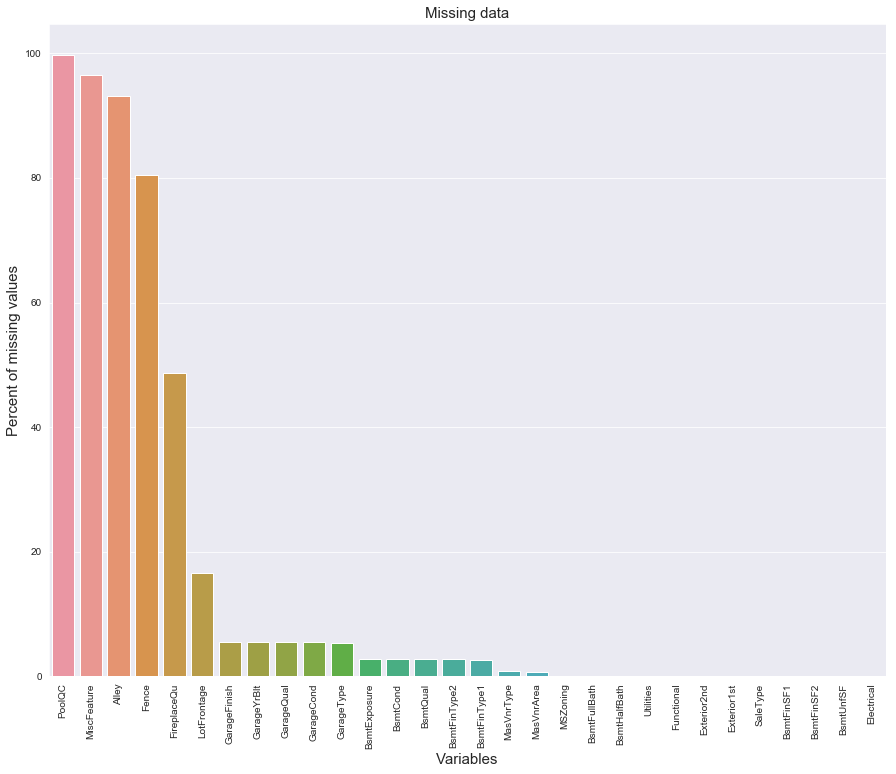

In [89]:
features_na = (features.isnull().sum() / len(features)) * 100
features_na = features_na.drop(features_na[features_na == 0].index).sort_values(ascending = False)[:30]

f, ax = plt.subplots(figsize = (15, 12))
plt.xticks(rotation = '90')
sns.barplot(x = features_na.index, y = features_na)
plt.xlabel('Variables', fontsize = 15)
plt.ylabel('Percent of missing values', fontsize = 15)
plt.title('Missing data', fontsize = 15)

In this first chunk we will fill the missing values by looking at the description of the features and then we decide to put some specific values for the feature or to put the most frequent values (the mode).



- PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.

- Functional : data description says NA means "typical".

- Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.

- KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent, so that is the mode) for the missing value in KitchenQual.

- Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string using the mode.

- SaleType : Fill in with most frequent (mode), which is "WD".

In [90]:
features["PoolQC"] = features["PoolQC"].fillna("None")
features['Functional'] = features['Functional'].fillna('Typ')
features['Electrical'] = features['Electrical'].fillna("SBrkr")
features['KitchenQual'] = features['KitchenQual'].fillna("TA")


features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])
features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])

Now we will use some for loops to put the same values to similar features, whenever we find a missing value:

- GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage).

- GarageType, GarageFinish, GarageQual, GarageCond, BsmtQual, BsmtExposure, BsmtCond, BsmtFinType1 and BsmtFinType2 : Replacing missing data with None.


In [91]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    features[col] = features[col].fillna(0)
    
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual', 'BsmtExposure' , 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2']:
    features[col] = features[col].fillna('None')

- MSZoning (The general zoning classification) : we fill the missing data with the most frequent value of the group in the same 'MSSubClass'.

In [92]:
features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

Now we want to visualize all the features with dtype equal to 'object':

In [93]:
objects = []
for i in features.columns:
    if features[i].dtype == object:
        objects.append(i)

In [94]:
objects

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

We want to manage the missing data in this feature in the same way, by putting the 'None' value whenever we find a missing value in these columns.

In [95]:
features.update(features[objects].fillna('None'))

- LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

In [96]:
features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

Let's take a look to the actual situation of the missing data:

Text(0.5,1,'Missing data')

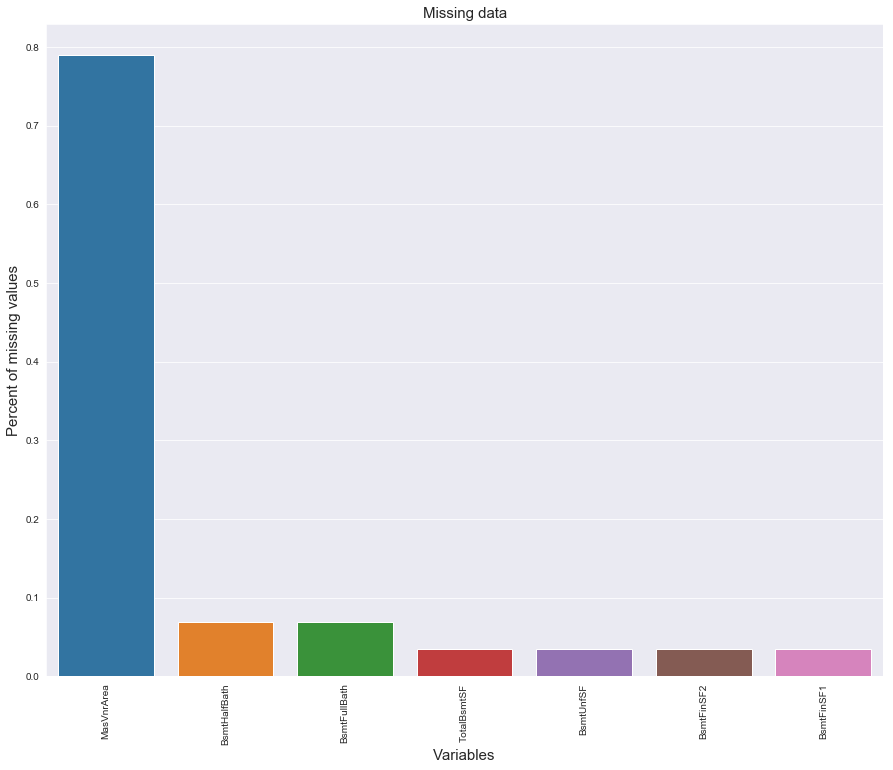

In [97]:
features_na = (features.isnull().sum() / len(features)) * 100
features_na = features_na.drop(features_na[features_na == 0].index).sort_values(ascending = False)[:30]

f, ax = plt.subplots(figsize = (15, 12))
plt.xticks(rotation = '90')
sns.barplot(x = features_na.index, y = features_na)
plt.xlabel('Variables', fontsize = 15)
plt.ylabel('Percent of missing values', fontsize = 15)
plt.title('Missing data', fontsize = 15)

So we have already some features with missing values, and these features are all numerical ones; we want to fill in the missing fields of these features with zeros.

We want also to save the names of these numerical columns to calculate the skewness and then, for the ones with a skewness value grater than 0.5, we want to apply a transformation.

In [98]:
# Filling in the rest of the Nan values

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = []

for i in features.columns:
    if features[i].dtype in numeric_dtypes:
        numerics.append(i)
        
features.update(features[numerics].fillna(0))

Now we want to calculate the skewness of the "numerics" features and we try to transform the ones with a value greather than 0.5:

In [99]:
skew_features = features[numerics].apply(lambda x: skew(x)).sort_values(ascending = False)

skew_features

MiscVal         21.934
PoolArea        17.676
LotArea         13.162
LowQualFinSF    12.076
3SsnPorch       11.364
KitchenAbvGr     4.297
BsmtFinSF2       4.141
EnclosedPorch    3.999
ScreenPorch      3.942
BsmtHalfBath     3.927
MasVnrArea       2.626
OpenPorchSF      2.529
WoodDeckSF       1.847
1stFlrSF         1.261
LotFrontage      1.107
GrLivArea        1.071
BsmtFinSF1       0.981
BsmtUnfSF        0.915
2ndFlrSF         0.859
TotRmsAbvGrd     0.750
Fireplaces       0.727
HalfBath         0.696
TotalBsmtSF      0.671
BsmtFullBath     0.623
OverallCond      0.568
BedroomAbvGr     0.326
OverallQual      0.188
FullBath         0.166
GarageArea       0.156
GarageCars      -0.226
YearRemodAdd    -0.450
YearBuilt       -0.600
GarageYrBlt     -3.901
dtype: float64

A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. Normality is an important assumption for many techniques, also for linear regression. In other words we are doing the same of what we did for the price variable at the beginning of the notebook.

In [100]:
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print(skew_index)

for i in skew_index:
    
    features[i] = boxcox1p(features[i], boxcox_normmax(features[i] + 1))

Index(['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch',
       'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch',
       'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', '1stFlrSF',
       'LotFrontage', 'GrLivArea', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF',
       'TotRmsAbvGrd', 'Fireplaces', 'HalfBath', 'TotalBsmtSF', 'BsmtFullBath',
       'OverallCond'],
      dtype='object')


We decided to drop these features because they have almost the same values for each house (so is a redundant column):

In [101]:
features = features.drop(['Utilities', 'Street', 'PoolQC',], axis = 1)

### Features engeneering

Now we create some new columns and we hope these new features are really correlated with the price variable:

In [102]:
features['YrBltAndRemod'] = features['YearBuilt'] + features['YearRemodAdd']
features['TotalSF'] = features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']

features['Total_sqr_footage'] = (features['BsmtFinSF1'] + features['BsmtFinSF2'] + features['1stFlrSF'] + features['2ndFlrSF'])

features['Total_Bathrooms'] = (features['FullBath'] + (0.5 * features['HalfBath']) + features['BsmtFullBath'] + (0.5 * features['BsmtHalfBath']))

features['Total_porch_sf'] = (features['OpenPorchSF'] + features['3SsnPorch'] + features['EnclosedPorch'] + features['ScreenPorch'] + features['WoodDeckSF'])

In [103]:
features['haspool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
features['has2ndfloor'] = features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
features['hasgarage'] = features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
features['hasbsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
features['hasfireplace'] = features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [104]:
print(features.shape)

final_features = pd.get_dummies(features).reset_index(drop = True)
print(final_features.shape)

(2913, 86)
(2913, 333)


We can see that we have increased the number of features from 86 to 333; this is because we applied the get_dummies function to the original dataset and we create a lot of features with zeros or ones with the following meaning : if the house has a characteristic, we have a one, otherwise we have a zero.

In [106]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2913 entries, 0 to 2912
Data columns (total 86 columns):
MSSubClass           2913 non-null object
MSZoning             2913 non-null object
LotFrontage          2913 non-null float64
LotArea              2913 non-null float64
Alley                2913 non-null object
LotShape             2913 non-null object
LandContour          2913 non-null object
LotConfig            2913 non-null object
LandSlope            2913 non-null object
Neighborhood         2913 non-null object
Condition1           2913 non-null object
Condition2           2913 non-null object
BldgType             2913 non-null object
HouseStyle           2913 non-null object
OverallQual          2913 non-null int64
OverallCond          2913 non-null float64
YearBuilt            2913 non-null int64
YearRemodAdd         2913 non-null int64
RoofStyle            2913 non-null object
RoofMatl             2913 non-null object
Exterior1st          2913 non-null object
Exterior2nd

Now we are sure we have no others missing values in the dataset and we can split again the dataset:

In [107]:
X = final_features.iloc[:len(y), :]
X_sub = final_features.iloc[len(X):, :]

print('X', X.shape, 'y', y.shape, 'X_sub', X_sub.shape)

X (1454, 333) y (1454,) X_sub (1459, 333)


We append in the train dataset the "Sale Price" variable.

In [108]:
X['SalePrice'] = y

In [109]:
X.shape

(1454, 334)

### Removing features

First of all we want to remove the first five negative correlated features with the price:

In [110]:
f_corr = X.corr()

In [111]:
f_corr['SalePrice'].sort_values(ascending = True)[:5]

ExterQual_TA       -0.598
KitchenQual_TA     -0.537
FireplaceQu_None   -0.509
BsmtQual_TA        -0.477
GarageFinish_Unf   -0.433
Name: SalePrice, dtype: float64

In [112]:
X = X.drop(['SalePrice','ExterQual_TA','KitchenQual_TA','FireplaceQu_None','BsmtQual_TA','GarageFinish_Unf'], axis = 1).copy()

In [113]:
X_sub = X_sub.drop(['ExterQual_TA','KitchenQual_TA','FireplaceQu_None','BsmtQual_TA','GarageFinish_Unf'], axis = 1).copy()

In [114]:
print('X', X.shape, 'y', y.shape, 'X_sub', X_sub.shape)

X (1454, 328) y (1454,) X_sub (1459, 328)


Let's remove in the end the features with a high number of zeros, because by considering them we can overfit with the models and our predictions will be affected by these useless features.

In [115]:
overfit_list = []

for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 98.44:
        print(i)
        overfit_list.append(i)

overfit_list = list(overfit_list)
overfit_list.append('MSZoning_C (all)')

PoolArea
haspool
MSSubClass_150
MSSubClass_180
MSSubClass_40
MSSubClass_45
MSSubClass_75
MSSubClass_85
MSZoning_C (all)
MSZoning_RH
LotShape_IR3
LotConfig_FR3
LandSlope_Sev
Neighborhood_Blmngtn
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_MeadowV
Neighborhood_NPkVill
Neighborhood_Veenker
Condition1_PosA
Condition1_PosN
Condition1_RRAe
Condition1_RRNe
Condition1_RRNn
Condition2_Artery
Condition2_Feedr
Condition2_Norm
Condition2_PosA
Condition2_PosN
Condition2_RRAe
Condition2_RRAn
Condition2_RRNn
HouseStyle_1.5Unf
HouseStyle_2.5Fin
HouseStyle_2.5Unf
RoofStyle_Flat
RoofStyle_Gambrel
RoofStyle_Mansard
RoofStyle_Shed
RoofMatl_Membran
RoofMatl_Metal
RoofMatl_Roll
RoofMatl_Tar&Grv
RoofMatl_WdShake
RoofMatl_WdShngl
Exterior1st_AsbShng
Exterior1st_AsphShn
Exterior1st_BrkComm
Exterior1st_CBlock
Exterior1st_ImStucc
Exterior1st_Stone
Exterior2nd_AsbShng
Exterior2nd_AsphShn
Exterior2nd_Brk Cmn
Exterior2nd_CBlock
Exterior2nd_ImStucc
Exterior2nd_Other
Exterior2nd_Stone
MasVnrType_BrkCmn
Exte

In [116]:
X = X.drop(overfit_list, axis = 1).copy()
X_sub = X_sub.drop(overfit_list, axis = 1).copy()

print('X', X.shape, 'y', y.shape, 'X_sub', X_sub.shape)

X (1454, 226) y (1454,) X_sub (1459, 226)


## Modelling

### Setting up models

Now we define the number of folds to cross validate the algorithms and then, to evaluate the performances, we implement two functions; the first one calculate the rmsle (that is the function that will evaluate our work) and the second one that is the cross validation rmse that will evaluate the error for all the combinations of the folds we created.

In [117]:
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)



def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


def cv_rmse(model, X = X):
    rmse = np.sqrt(-cross_val_score(model, X, y,
                                    scoring = "neg_mean_squared_error",
                                    cv = kfolds))
    return (rmse)

We want to setup the models and to choose the best parameters with the make_pipeline function; so we create four lists of parameters (for Ridge, Lasso and Elasticnet regressors) and we apply where it's possible, the RobustScaler function that makes the predictions with these models not dependent from other outliers. These are the models we initialize:

- Ridge
- Lasso
- Elasticnet
- SVR
- Gradient Boosting Regressor
- LGBMRegressor
- XGBRegressor


Finally we use the StackingCVRegressor, that is a combination of other regressors and we used as meta regressor the XGBoost.

In [118]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]

e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]

e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]


ridge = make_pipeline(RobustScaler(),
                      RidgeCV(alphas = alphas_alt, cv = kfolds,))

lasso = make_pipeline(RobustScaler(),
                      LassoCV(max_iter = 1e7, alphas = alphas2,
                              random_state = 42, cv = kfolds))

elasticnet = make_pipeline(RobustScaler(),
                           ElasticNetCV(max_iter = 1e7, alphas = e_alphas,
                                        cv = kfolds, random_state = 42, l1_ratio = e_l1ratio))
                                        
svr = make_pipeline(RobustScaler(),
                      SVR(C= 20, epsilon = 0.008, gamma = 0.0003,))

gbr = GradientBoostingRegressor(n_estimators = 3000, learning_rate = 0.05,
                                   max_depth = 4, max_features = 'sqrt',
                                   min_samples_leaf = 15, min_samples_split = 10, 
                                   loss = 'huber', random_state = 42)

lightgbm = LGBMRegressor(objective = 'regression', 
                                       num_leaves = 4,
                                       learning_rate = 0.01, 
                                       n_estimators = 5000,
                                       max_bin = 200, 
                                       bagging_fraction = 0.75,
                                       bagging_freq = 5, 
                                       bagging_seed = 7,
                                       feature_fraction = 0.2,
                                       feature_fraction_seed = 7,
                                       verbose = -1,
                                       )
                                       

xgboost = XGBRegressor(learning_rate = 0.01, n_estimators = 3460,
                                     max_depth = 3, min_child_weight = 0,
                                     gamma = 0, subsample = 0.7,
                                     colsample_bytree = 0.7,
                                     objective = 'reg:linear', nthread = -1,
                                     scale_pos_weight = 1, seed = 27,
                                     reg_alpha = 0.00006, random_state = 42)

stack_gen = StackingCVRegressor(regressors = (ridge, lasso, elasticnet,
                                            gbr, xgboost, lightgbm),
                                meta_regressor = xgboost,
                                use_features_in_secondary = True)

Now we want to evaluate the mean and the standard deviation of the models using the cv_rmse function we created before:

In [119]:
score = cv_rmse(ridge)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(elasticnet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(svr)
print("SVR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(lightgbm)
print("Lightgbm score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(gbr)
print("GradientBoosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(xgboost)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Kernel Ridge score: 0.1100 (0.0098)

Lasso score: 0.1101 (0.0097)

ElasticNet score: 0.1101 (0.0097)

SVR score: 0.1094 (0.0098)

Lightgbm score: 0.1136 (0.0124)

GradientBoosting score: 0.1146 (0.0110)

Xgboost score: 0.1154 (0.0128)



We can see the performances of our models and we can use these values to create the prediction function.

### Fitting models

It's time to fit our models on the train set respect to the SalesPrices variable:

In [120]:
ridge = ridge.fit(X, y)
print('Ridge model fitted')

lasso = lasso.fit(X, y)
print('Lasso model fitted')

elasticnet = elasticnet.fit(X, y)
print('Elasticnet model fitted')

svr = svr.fit(X, y)
print('Svr model fitted')

gbr = gbr.fit(X, y)
print('Gbr model fitted')

lgb = lightgbm.fit(X, y)
print('Lgb model fitted')

xgb = xgboost.fit(X, y)
print('Xgb model fitted')

stack_gen = stack_gen.fit(np.array(X), np.array(y))
print('Stack_gen model fitted')

Ridge model fitted
Lasso model fitted
Elasticnet model fitted
Svr model fitted
Gbr model fitted
Lgb model fitted
Xgb model fitted
Stack_gen model fitted


## Prediction

Let's define a function that will return the predicted values of the prices for the test_df, by making a weighted mean between our 8 models; then, we know the real prices of the train, so we can calculate the rmsle between the prices and our predicted ones:

In [121]:
def predict(X):
    return ((0.1 * elasticnet.predict(X)) + (0.1 * lasso.predict(X)) + \
            (0.1 * ridge.predict(X)) + (0.1 * svr.predict(X)) + \
            (0.1 * gbr.predict(X)) + (0.15 * xgb.predict(X)) + \
            (0.1 * lgb.predict(X)) + (0.25 * stack_gen.predict(np.array(X))))


            
print('RMSLE score on train data:')
print(rmsle(y, predict(X)))


RMSLE score on train data:
0.06530979937866564


In [122]:
predict(X)

array([12.23826285, 12.13092607, 12.27682529, ..., 12.48521942,
       11.86063289, 11.9297247 ])

Our predictions are rescaled (because we changed the prices with the logarithmic transformation), so we need to consider the exponential of our predicted values:

In [123]:
final_pred = np.exp(predict(X_sub))

sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = final_pred

sub.head(20)

,Id,SalePrice
0,1461,121246.329
1,1462,158812.275
2,1463,186776.076
3,1464,202200.734
4,1465,188215.804
5,1466,173899.212
6,1467,177660.324
7,1468,165933.262
8,1469,186419.815
9,1470,123000.611


In [124]:
len(sub)

1459

In the end, we create the csv file for the submission:

In [125]:
sub.to_csv('submission.csv', index = False)